<a href="https://www.kaggle.com/code/emreustundag/ensemble-learning-and-model-comparison?scriptVersionId=110334038" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Ensemble Learning and Model Comparison

Outline of the project:

* [Introduction](#1)
* [Packages & Libraries](#2)
* [Create Dataset](#3)
* [KNN, SVM, DT](#4)
    * [K-Nearest Neighbor (KNN)](#5)
    * [Support Vector Machine (SVM)](#6)
    * [Decision Tree (DT)](#7)
* [Ensemble Learning](#8)
    * [Random Forest (RF)](#9)
    * [Ada Boost](#10)
    * [Voting Classifier](#11)
* [Model Comparison](#13)

<a id = "1"></a>
### Introduction
<img src="https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/61f7bbd4e90cce440b88ea32_ensemble-learning.png" width = "900" height = "900">

Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models. The three main classes of ensemble learning methods are bagging, stacking, and boosting, and it is important to both have a detailed understanding of each method and to consider them on your predictive modeling project. In this project, firstly we will create three type data and classify the data points using KNN, SVM, DT, RF, AdaBoost and Voting Classifier models. Finally we will evaluate models and visualize the results. Let's begin with importing required packages and libraries.

<a id = "2"></a>
### Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap #for meshgrid

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

import warnings
warnings.filterwarnings("ignore")

<a id = "3"></a>
### Create Dataset

In [2]:
# parameters setting
random_state = 42

n_samples = 2000
n_features = 20
n_classes = 2

noise_class = 0.2

X,y = make_classification(n_samples = n_samples, 
                        n_features = n_features,
                        n_classes = n_classes,
                        n_repeated = 0,
                        n_redundant = 0,
                        n_informative = n_features - 1,
                        random_state = random_state,
                        n_clusters_per_class = 1,
                        flip_y = noise_class)

<AxesSubplot:xlabel='0', ylabel='1'>

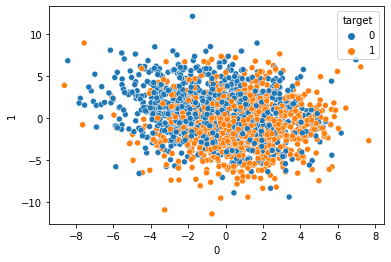

In [3]:
# visualize created data
data = pd.DataFrame(X)
data["target"] = y
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data = data)

In [4]:
data_classification = (X, y)

<AxesSubplot:xlabel='0', ylabel='1'>

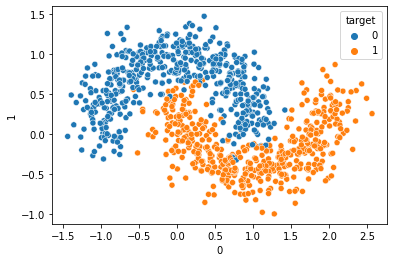

In [5]:
# Make non-linear moon data
n_samples = 1000
noise_moon = 0.2
random_state = 42

moon = make_moons(n_samples = n_samples, noise = noise_moon, random_state = random_state)

# visualize moon data
data = pd.DataFrame(moon[0])
data["target"] = moon[1]
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data = data)

<AxesSubplot:xlabel='0', ylabel='1'>

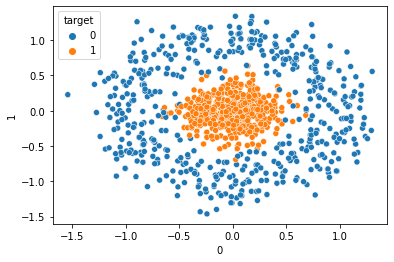

In [6]:
# Make non-linear circle data
n_samples = 1000
noise_circle = 0.2
random_state = 42

circle = make_circles(n_samples = n_samples, noise = noise_circle, random_state = random_state, factor = 0.1)

# visualize circle data
data = pd.DataFrame(circle[0])
data["target"] = circle[1]
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data = data)

In [7]:
datasets = [moon, circle]

Now we got all three dataset. Let's implement basic classifiers!

<a id = "4"></a>
### KNN, SVM, DT

<a id = "5"></a>
#### K-Nearest Neighbor (KNN)

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.xl.ts=1639762044031.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image" width = 900, height = 400>

<a id = "6"></a>
#### Support Vector Machine (SVM)

A support vector machine (SVM) is a supervised learning algorithm used for many classification and regression problems , including signal processing  medical applications, natural language processing, and speech and image recognition.

The objective of the SVM algorithm is to find a hyperplane that, to the best degree possible, separates data points of one class from those of another class. “Best” is defined as the hyperplane with the largest margin between the two classes, represented by plus versus minus in the figure below. Margin means the maximal width of the slab parallel to the hyperplane that has no interior data points. Only for linearly separable problems can the algorithm find such a hyperplane, for most practical problems the algorithm maximizes the soft margin allowing a small number of misclassifications.

<img src="https://uk.mathworks.com/discovery/support-vector-machine/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1630399098268.jpg" width = 600, height = 400>

<a id = "7"></a>
#### Decision Tree (DT)

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

<img src="https://e6v4p8w2.rocketcdn.me/wp-content/uploads/2022/04/A-Sample-Decision-Tree-Visualized-1024x712.png" width = 600, height = 400>

We shortly looked at what these models are. Now, let's implement the code!

In [8]:
svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 15)
dt = DecisionTreeClassifier(random_state = 42)

names = ["SVC", "KNN", "Decision Tree"]
classifiers = [svc, knn, dt]

Dataset # 1
SVC: test set score: 0.9675 
SVC: train set score: 0.975 

KNN: test set score: 0.97 
KNN: train set score: 0.9766666666666667 

Decision Tree: test set score: 0.9525 
Decision Tree: train set score: 1.0 

----------------------------------------
Dataset # 2
SVC: test set score: 0.975 
SVC: train set score: 0.99 

KNN: test set score: 0.97 
KNN: train set score: 0.9833333333333333 

Decision Tree: test set score: 0.9575 
Decision Tree: train set score: 1.0 

----------------------------------------


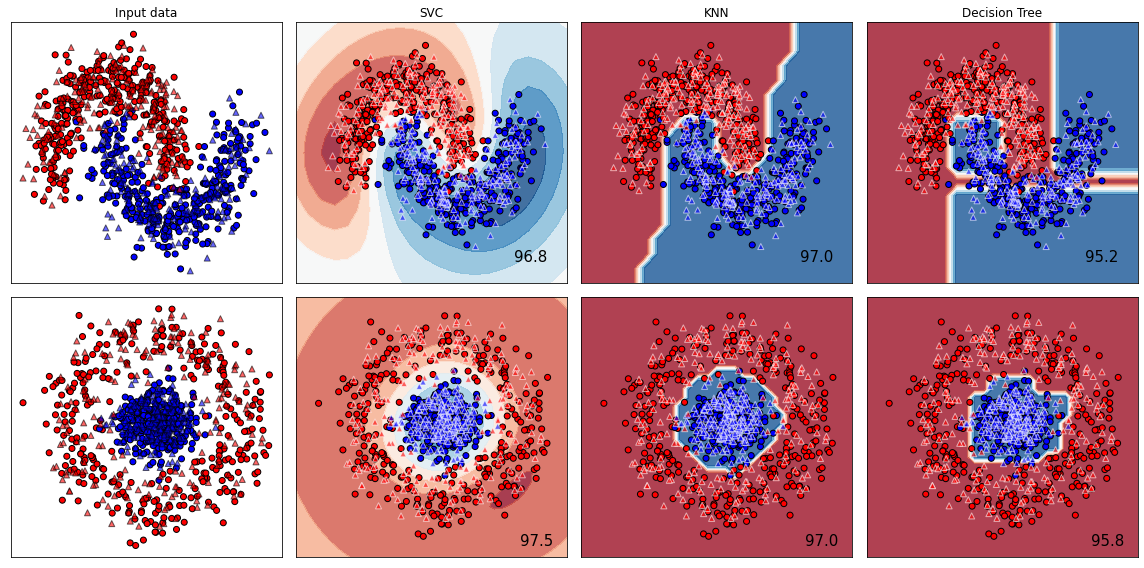

In [9]:
h = 0.2
i = 1

plt.figure(figsize = (16, 8))

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = random_state)

    # meshgrid
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # color maps
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000","#0000FF"])
    
    # subplots
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, alpha = 0.6, edgecolors = 'k', marker = "^")
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    print("Dataset # {}".format(ds_cnt + 1))
    
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {} ".format(name, score_train))
        print()
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap = cm, alpha = 0.8)
        
        # plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap = cm_bright, edgecolors = 'k')
        # plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, marker = '^', edgecolors = 'white', alpha = 0.6)
        
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score), size = 15, horizontalalignment = 'right')
        i += 1
    print("----------------------------------------")

plt.tight_layout()
plt.show()

In [10]:
def make_classify(dc, clfs, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()

# Let's evaluate the data created first. parameters that differs from moon and circle: n_features = 50, noise = 0.3
print("Dataset # 0")
make_classify(data_classification, classifiers, names)

Dataset # 0
SVC: test set score: 0.8925
SVC: train set score: 0.9033333333333333

KNN: test set score: 0.89
KNN: train set score: 0.8983333333333333

Decision Tree: test set score: 0.765
Decision Tree: train set score: 1.0



Observations:
* SVM's score is better than others on higher dimensional data especially for binary classification problems
* KNN is more suitable algorithm than SVM on multiclass classification problems (you can see that changing parameters on make_classify function that we define top of the kernel)
* Decision tree algorithm is prone to overfitting and be negatively effected from outliers. Regularization or random forest algorithm can be the solution.

<a id = "8"></a>
### Ensemble Learning

Ensemble Learning is a method of reaching a consensus in predictions by fusing the salient properties of two or more models. The final ensemble learning framework is more robust than the individual models that constitute the ensemble because ensembling reduces the variance in the prediction errors

Ensemble Learning tries to capture complementary information from its different contributing models—that is, an ensemble framework is successful when the contributing models are statistically diverse. 

In other words, models that display performance variation when evaluated on the same dataset are better suited to form an ensemble.


<a id = "9"></a>
#### Random Forest

A random forest is a group of decision trees. However, there are some differences between the two. A decision tree tends to create rules, which it uses to make decisions. A random forest will randomly choose features and make observations, build a forest of decision trees, and then average out the results.

The theory is that a large number of uncorrelated trees will create more accurate predictions than one individual decision tree. This is because the volume of trees work together to protect each other from individual errors and overfitting.

For a random forest to perform well, they need three things:

* An identifiable signal so that models are not just guessing
* The predictions made by the trees need to have low levels of correlation with the other trees
* Features that have some level of predictive power: GI=GO

**Random Forest is widely used for feature importance estimation.**

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg" width = 600, height = 400>

Source: [https://www.tibco.com/reference-center/what-is-a-random-forest]

<a id = "10"></a>
#### AdaBoost

Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. Adaboost should meet two conditions:

* The classifier should be trained interactively on various weighed training examples.
* In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1542651255/image_2_pu8tu6.png" width = 600, height = 400>

Source: [https://www.datacamp.com/tutorial/adaboost-classifier-python]

<a id = "11"></a>
#### Voting Classifier

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.

Voting Classifier supports two types of votings.

* Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.

* Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

Source: [https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/]

Dataset # 1
SVC: test set score: 0.9675 
SVC: train set score: 0.975 

KNN: test set score: 0.97 
KNN: train set score: 0.9766666666666667 

Decision Tree: test set score: 0.9 
Decision Tree: train set score: 0.92 

Random Forest: test set score: 0.895 
Random Forest: train set score: 0.9 

AdaBoost: test set score: 0.95 
AdaBoost: train set score: 0.995 

Voting Classifier: test set score: 0.9675 
Voting Classifier: train set score: 0.9733333333333334 

----------------------------------------
Dataset # 2
SVC: test set score: 0.975 
SVC: train set score: 0.99 

KNN: test set score: 0.97 
KNN: train set score: 0.9833333333333333 

Decision Tree: test set score: 0.8375 
Decision Tree: train set score: 0.8583333333333333 

Random Forest: test set score: 0.955 
Random Forest: train set score: 0.98 

AdaBoost: test set score: 0.9575 
AdaBoost: train set score: 1.0 

Voting Classifier: test set score: 0.975 
Voting Classifier: train set score: 0.995 

---------------------------------------

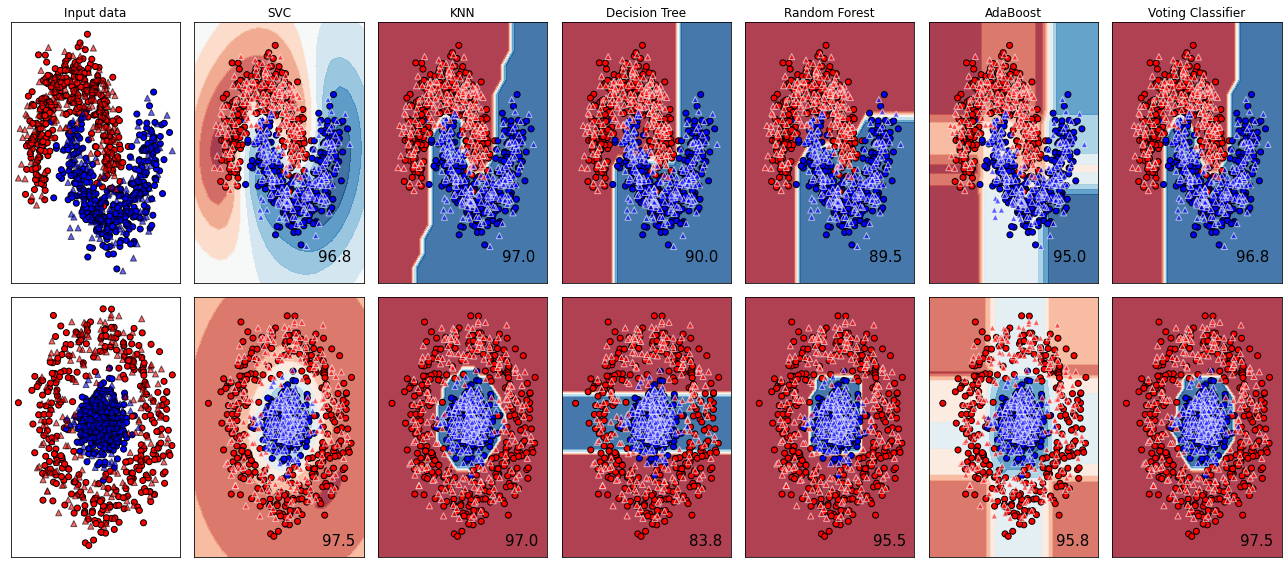

In [11]:
svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 15)
dt = DecisionTreeClassifier(random_state = 42, max_depth = 2)

# adding ensemble models
rf = RandomForestClassifier(n_estimators = 10, random_state = 42,  max_depth = 2)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = 10, random_state = 42)
vot = VotingClassifier(estimators = [("svc", svc), ("knn", knn), ("dt", dt), ("rf", rf), ("ada", ada)])

names = ["SVC", "KNN", "Decision Tree", "Random Forest", "AdaBoost", "Voting Classifier"]
classifiers = [svc, knn, dt, rf, ada, vot]

h = 0.2
i = 1

plt.figure(figsize = (18, 8))

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = random_state)

    # meshgrid
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # color maps
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000","#0000FF"])
    
    # subplots
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    if ds_cnt == 0:
        ax.set_title("Input data")
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, alpha = 0.6, edgecolors = 'k', marker = "^")
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    print("Dataset # {}".format(ds_cnt + 1))
    
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {} ".format(name, score_train))
        print()
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap = cm, alpha = 0.8)
        
        # plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap = cm_bright, edgecolors = 'k')
        # plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, marker = '^', edgecolors = 'white', alpha = 0.6)
        
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score), size = 15, horizontalalignment = 'right')
        i += 1
    print("----------------------------------------")

plt.tight_layout()
plt.show()

In [12]:
def make_classify(dc, clfs, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()

# Let's evaluate the data created first. parameters that differs from moon and circle: n_features = 50, noise = 0.3
print("Dataset # 0")
make_classify(data_classification, classifiers, names)

Dataset # 0
SVC: test set score: 0.8925
SVC: train set score: 0.9033333333333333

KNN: test set score: 0.89
KNN: train set score: 0.8983333333333333

Decision Tree: test set score: 0.72125
Decision Tree: train set score: 0.7416666666666667

Random Forest: test set score: 0.775
Random Forest: train set score: 0.8091666666666667

AdaBoost: test set score: 0.8225
AdaBoost: train set score: 0.8625

Voting Classifier: test set score: 0.875
Voting Classifier: train set score: 0.8925



Thanks. Please upvote if you like the work!